<div align=center>

| Nama                    | NRP        |
|:-----------------------:|:----------:|
| Aryan Shafa Wardana     | 5025211031 |
| Muhammad Ersya Vinorian | 5025211045 |

</div>

## Preprocessing Data

In [1]:
import pandas as pd
import missingno as msno
from sklearn import preprocessing

In [2]:
RAW_DATA = 'data/raw/bald_probability.csv'
PROCESSED_DATA = 'data/processed/bald_probability.csv'

In [3]:
df = pd.read_csv(RAW_DATA)

label_encoder = preprocessing.LabelEncoder()

#### Drop NaN values

<Axes: >

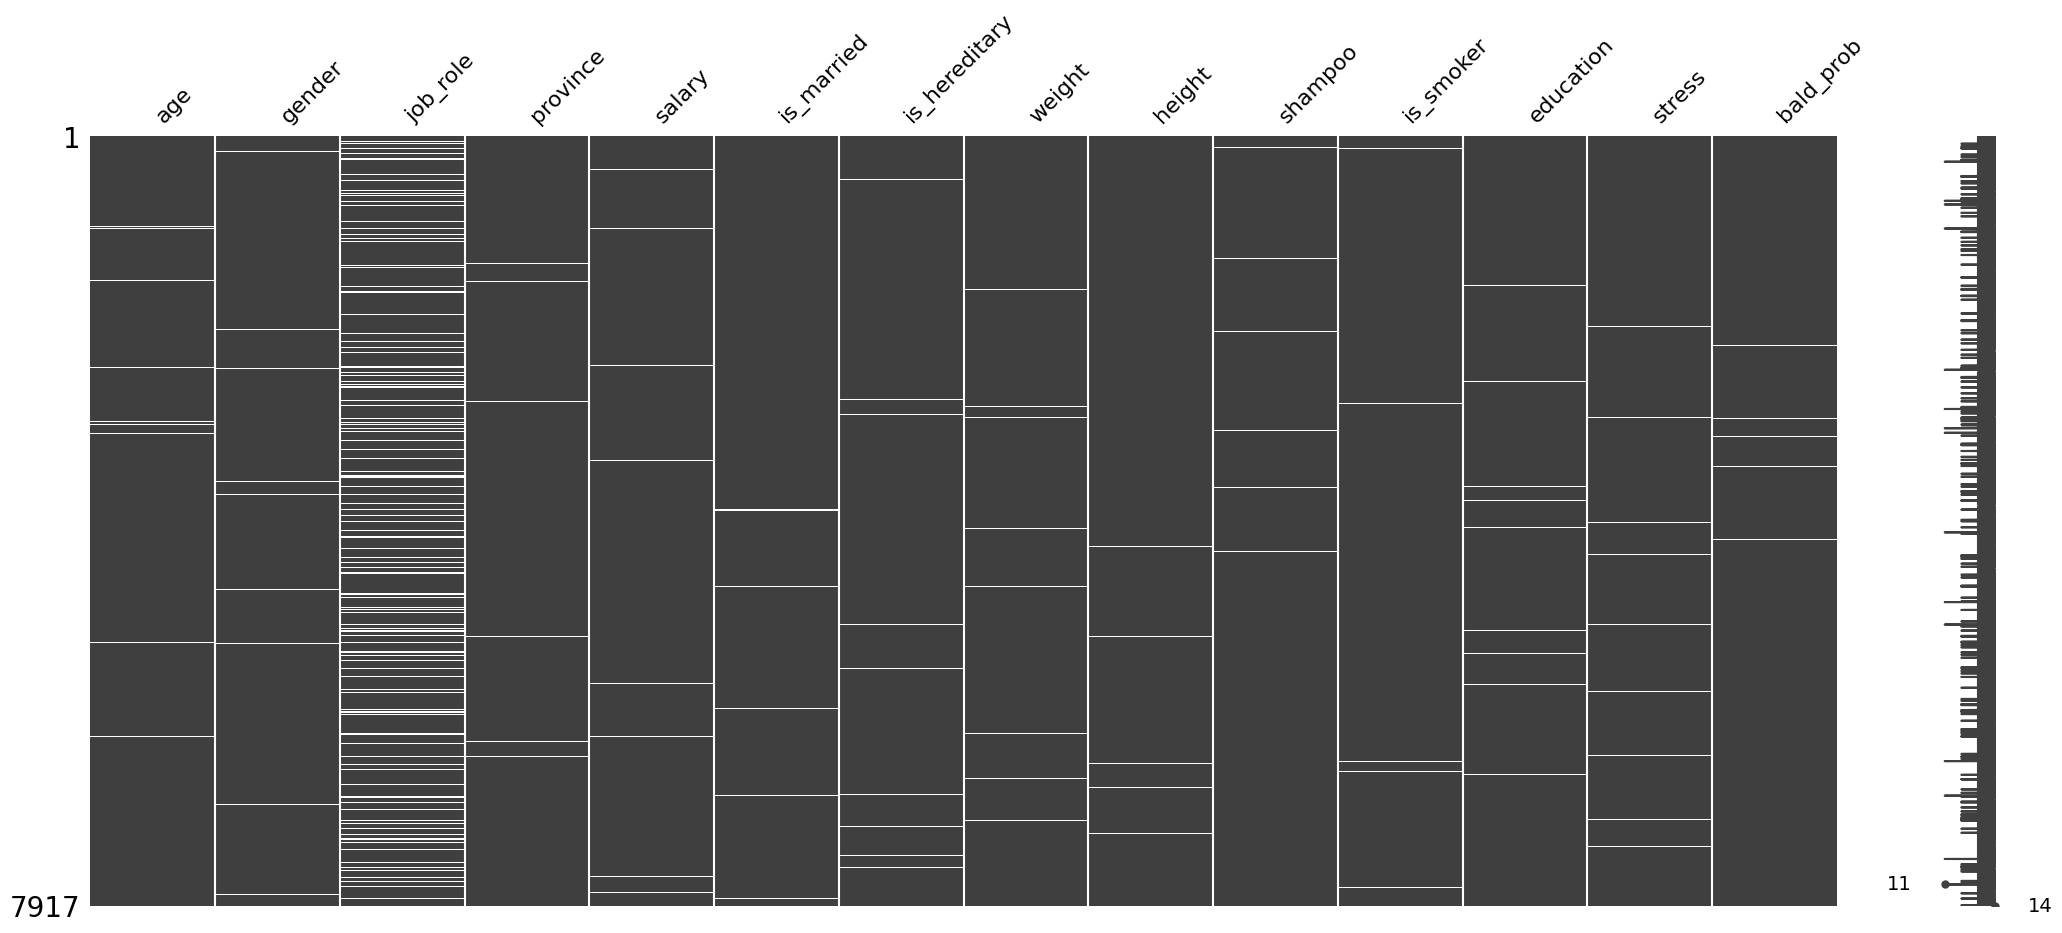

In [4]:
msno.matrix(df)

In [5]:
df = df.drop(columns='job_role')
df = df.dropna()

df.count()

age              7018
gender           7018
province         7018
salary           7018
is_married       7018
is_hereditary    7018
weight           7018
height           7018
shampoo          7018
is_smoker        7018
education        7018
stress           7018
bald_prob        7018
dtype: int64

#### Change float integers to integer type

In [6]:
df['is_hereditary'] = df['is_hereditary'].map(int)
df['is_married'] = df['is_married'].map(int)
df['is_smoker'] = df['is_smoker'].map(int)
df['stress'] = df['stress'].map(int)
df['age'] = df['age'].map(int)

df

,age,gender,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
0,27,female,Bengkulu,7.957453e+06,1,0,54.315053,170.428542,Pantone,1,Bachelor Degree,5,0.605974
1,53,female,Bandung,7.633003e+06,1,0,72.873404,165.530097,Pantone,0,Bachelor Degree,7,0.532860
2,37,female,Bandung,6.637625e+06,1,0,46.321533,154.599388,Moonsilk,0,Bachelor Degree,4,0.418442
3,36,female,Palu,3.624871e+06,1,0,51.539781,167.340481,Deadbuoy,1,Elementary School,9,0.804050
4,38,male,Palangkaraya,6.031808e+06,1,0,60.726909,165.514773,Merpati,1,Magister Degree,1,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7911,21,female,Samarinda,5.326614e+06,1,1,50.257686,189.341664,Merpati,0,Bachelor Degree,6,0.439846
7912,32,male,Yogyakarta,6.024409e+06,1,0,44.432438,154.578859,Deadbuoy,0,Senior High School,9,0.471229
7913,34,male,Manado,1.007043e+07,1,0,49.389914,158.782726,Shoulder & Head,1,Bachelor Degree,9,0.543821
7914,58,male,Mamuju,8.010815e+06,1,0,54.351968,154.478087,Deadbuoy,1,Magister Degree,6,0.643453


#### Encode categorical values

In [9]:
df['education'] = label_encoder.fit_transform(df['education'])
# df['job_role'] = label_encoder.fit_transform(df['job_role'])
df['province'] = label_encoder.fit_transform(df['province'])
df['shampoo'] = label_encoder.fit_transform(df['shampoo'])
df['gender'] = label_encoder.fit_transform(df['gender'])

df

,age,gender,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
0,27,0,5,7.957453e+06,1,0,54.315053,170.428542,3,1,0,5,0.605974
1,53,0,3,7.633003e+06,1,0,72.873404,165.530097,3,0,0,7,0.532860
2,37,0,3,6.637625e+06,1,0,46.321533,154.599388,2,0,0,4,0.418442
3,36,0,22,3.624871e+06,1,0,51.539781,167.340481,0,1,2,9,0.804050
4,38,1,20,6.031808e+06,1,0,60.726909,165.514773,1,1,4,1,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7911,21,0,26,5.326614e+06,1,1,50.257686,189.341664,1,0,0,6,0.439846
7912,32,1,33,6.024409e+06,1,0,44.432438,154.578859,0,0,5,9,0.471229
7913,34,1,15,1.007043e+07,1,0,49.389914,158.782726,4,1,0,9,0.543821
7914,58,1,14,8.010815e+06,1,0,54.351968,154.478087,0,1,4,6,0.643453


#### Separate probability into 2 categories

In [10]:
df['bald_prob'] = pd.cut(x=df['bald_prob'], bins=[0, 0.33, 0.66, 1], labels=['Less Likely', 'Likely', 'More Likely'])

df['bald_prob'].value_counts()

bald_prob
Likely         4424
More Likely    2070
Less Likely     524
Name: count, dtype: int64

#### Export processed data to csv file

In [11]:
df.to_csv(PROCESSED_DATA, index=False)